# Chapter12 Data Processing and Analysis

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [2]:
 list(s.index)

[0, 1, 2, 3]

In [3]:
s.values

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

In [4]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [5]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population",index=["Stockholm", "London", "Rome", "Paris"])
s["London"]

8615246

In [6]:
s.Stockholm

909976

In [7]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [8]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [9]:
s.min(), s.max()

(909976, 8615246)

In [10]:
 s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)


(1932472.75, 2572695.5, 4307876.0)

In [11]:
 s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

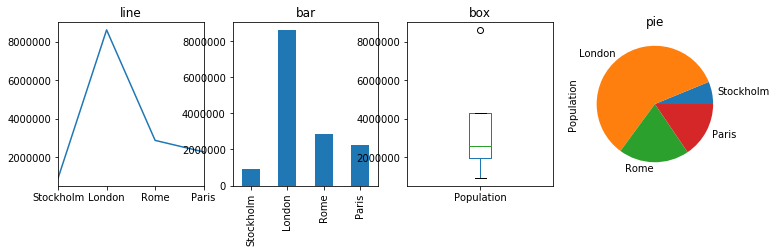

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

In [13]:
df = pd.DataFrame([[909976, "Sweden"],[8615246, "United Kingdom"],[2872086, "Italy"],[2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [14]:
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df    

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [15]:
df = pd.DataFrame([[909976, "Sweden"],[8615246, "United Kingdom"],[2872086, "Italy"],[2273305, "France"]],index=["Stockholm", "London", "Rome", "Paris"],columns=["Population", "State"])

In [16]:
 df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305], "State": ["Sweden", "United Kingdom", "Italy","France"]},index=["Stockholm", "London", "Rome", "Paris"])

In [17]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [18]:
 df.loc["Stockholm"]


Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [19]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [20]:
 df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [21]:
df.mean()

Population    3667653.25
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [23]:
df.dtypes


Population     int64
State         object
dtype: object

In [27]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [28]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank              105 non-null int64
City              105 non-null object
State             105 non-null object
Population        105 non-null object
Date of census    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [29]:
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [30]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [31]:
df_pop["State"].values[:3] # contains extra white spaces

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [32]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())
df_pop.head()

,Rank,City,State,Population,Date of census,NumericPopulation
0,1,London,United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [33]:
df_pop.dtypes

Rank                  int64
City                 object
State                object
Population           object
Date of census       object
NumericPopulation     int64
dtype: object

In [34]:
df_pop2 = df_pop.set_index("City")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [35]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head(7)

Rank Population    Date of census  NumericPopulation
State    City                                                          
Austria  Vienna       7  1,794,770    1 January 2015            1794770
Belgium  Antwerp     59    510,610    1 January 2014             510610
         Brussels    16  1,175,831    1 January 2014            1175831
Bulgaria Plovdiv     84    341,041  31 December 2013             341041
         Sofia       14  1,291,895  14 December 2014            1291895
         Varna       85    335,819  31 December 2013             335819
Croatia  Zagreb      24    790,017     31 March 2011             790017

In [36]:
 df_pop3.loc["Sweden"]


,Rank,Population,Date of census,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [37]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                            53
Population                 528,014
Date of census       31 March 2013
NumericPopulation           528014
Name: (Sweden, Gothenburg), dtype: object

In [38]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"],ascending=[False, True]).head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [39]:
city_counts = df_pop.State.value_counts()
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

In [40]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [41]:
df_pop5 = (df_pop.drop("Rank", axis=1).groupby("State").sum().sort_values("NumericPopulation",ascending=False))

Text(0.5, 0, 'Total pop. in top 105 cities')

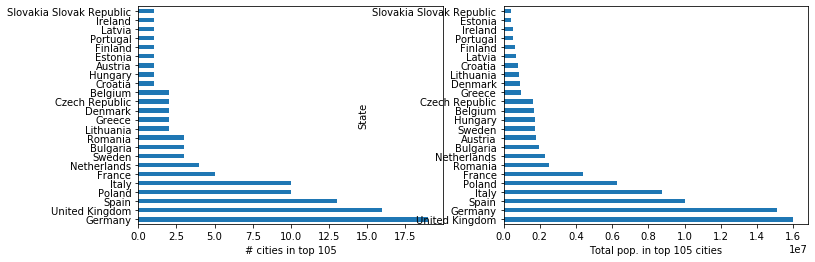

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")


In [43]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [45]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1",periods=31))
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int32

In [46]:
ts1["2015-1-3"]

2

In [47]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [48]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [49]:
ts1.index[2].nanosecond

0

In [50]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [51]:
import datetime
ts2 = pd.Series(np.random.rand(2),index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.093213
2015-02-01    0.063572
dtype: float64

In [52]:
periods = pd.PeriodIndex([pd.Period('2015-01'),
pd.Period('2015-02'),
pd.Period('2015-03')])
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.788943
2015-02    0.682872
2015-03    0.041006
Freq: M, dtype: float64

In [53]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [54]:
ts2.to_period('M')

2015-01    0.093213
2015-02    0.063572
Freq: M, dtype: float64

In [61]:
df1 = pd.read_csv('temperature_outdoor_2014.csv', delimiter="\t", names=["time", "outdoor"])

In [62]:
df2 = pd.read_csv('temperature_indoor_2014.csv', delimiter="\t", names=["time", "indoor"])

In [63]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [64]:
df1.time = (pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time")
df2.time = (pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


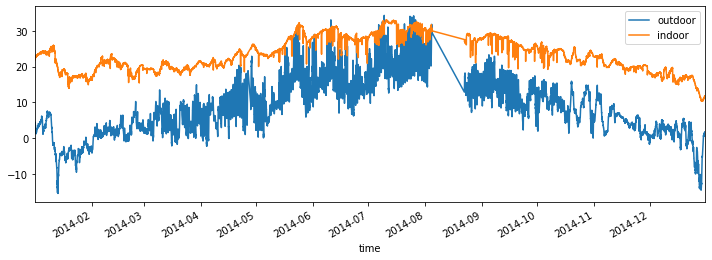

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [67]:
mask_jan = (df1.index >= "2014-1-1") & (df1.index < "2014-2-1")
df1_jan = df1[mask_jan]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


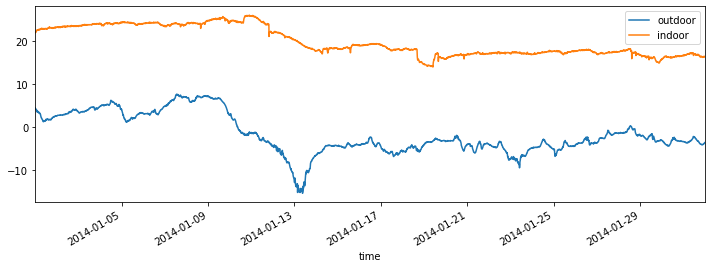

In [68]:
df2_jan = df2["2014-1-1":"2014-1-31"]
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

In [69]:
df1_month = df1.reset_index()
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [70]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [71]:
df_month = df1_month.join(df2_month)
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [72]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean()
for df in [df1, df2]], axis=1)
df_month.head(3)

G:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


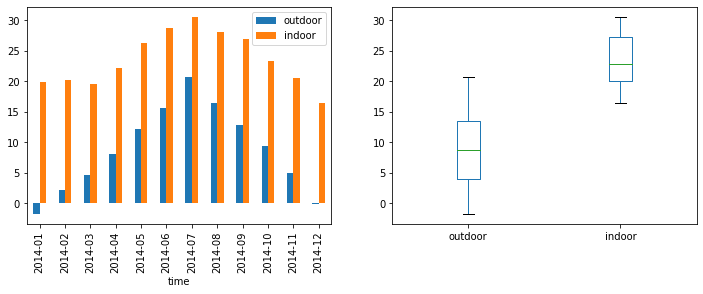

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

G:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


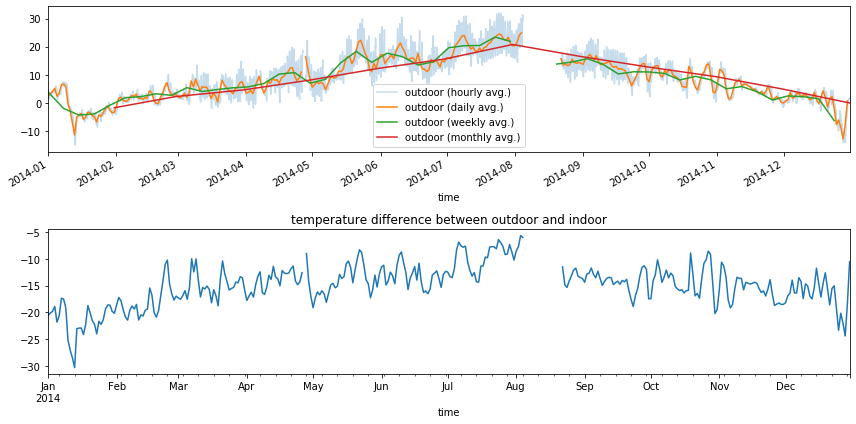

In [74]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]
df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")
fig.tight_layout()

In [75]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor":'None'}),df1.resample("5min").ffill().rename(columns={"outdoor":'ffill'}),df1.resample("5min").bfill().rename(columns={"outdoor":'bfill'})], axis=1).head()


,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


In [77]:
sns.set(style="darkgrid")
df1 = pd.read_csv('temperature_outdoor_2014.csv', delimiter="\t",names=["time", "outdoor"])
df1.time = (pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time").resample("10min").mean()

In [78]:
df2 = pd.read_csv('temperature_indoor_2014.csv', delimiter="\t",names=["time", "indoor"])
df2.time = (pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time").resample("10min").mean()

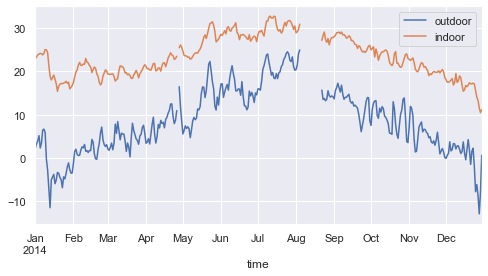

In [80]:
df_temp = pd.concat([df1, df2], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

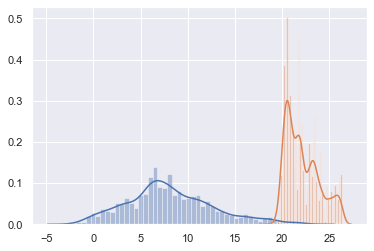

In [81]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

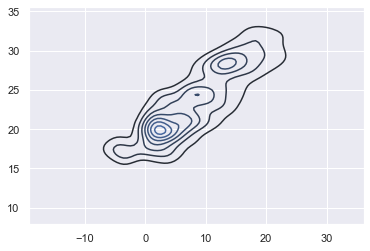

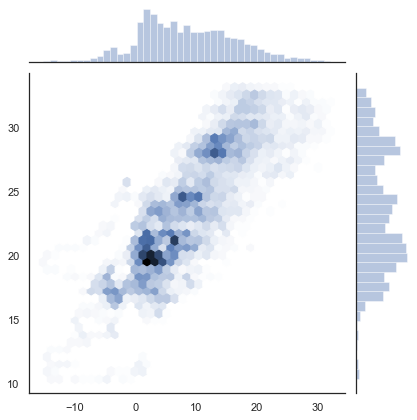

In [83]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values, df_temp.resample("H").mean()["indoor"].dropna().values, shade=False)
with sns.axes_style("white"):sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,df_temp.resample("H").mean()["indoor"].values,kind="hex")

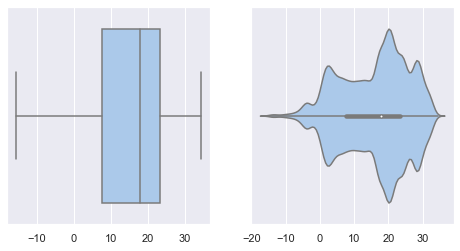

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

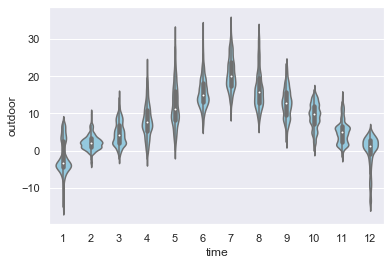

In [85]:
sns.violinplot(x=df_temp.dropna().index.month,
y=df_temp.dropna().outdoor, color="skyblue");

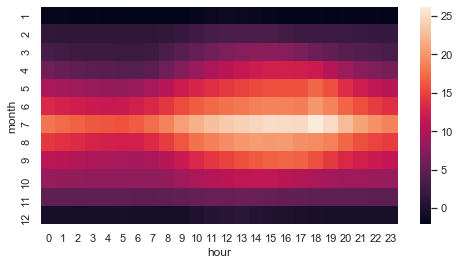

In [86]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
table = pd.pivot_table(df_temp, values='outdoor',index=['month'], columns=['hour'],aggfunc=np.mean)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax)

# Chapter 13 Statistics

In [91]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [92]:
np.median(x)

3.0

In [93]:
x.min(), x.max()

(0.9, 6.7)

In [94]:
x.var()

3.0700000000000007

In [95]:
x.std()


1.7521415467935233

In [96]:
x.var(ddof=1)

3.5085714285714293

In [97]:
x.std(ddof=1)

1.8731181032095732

In [98]:
np.random.rand()


0.09092016280061976

In [99]:
np.random.randn()

-1.0320159664253168

In [100]:
np.random.rand(5)

array([0.59010931, 0.46854746, 0.19480335, 0.78968702, 0.59511513])

In [101]:
np.random.randn(2, 4)


array([[ 0.59718777,  1.13182044, -0.8361685 , -0.98431383],
       [ 0.83500403, -0.17454909, -0.49399489, -0.94870038]])

In [102]:
np.random.randint(10, size=10)

array([7, 3, 6, 5, 1, 6, 3, 9, 3, 0])

In [103]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[17, 17, 13, 12, 16, 13, 17, 11, 13, 14],
       [14, 15, 12, 11, 11, 15, 12, 19, 19, 14]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

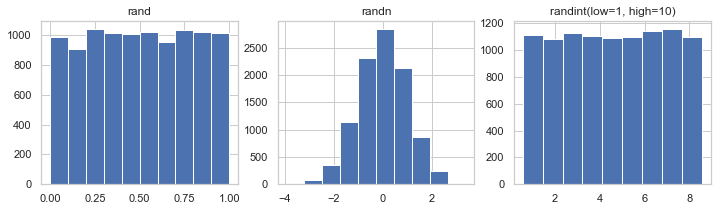

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000),bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [105]:
np.random.choice(10, 5, replace=False)

array([3, 2, 6, 1, 9])

In [106]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [107]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [108]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [109]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [110]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [111]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [112]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [113]:
prng.poisson(5, size=10)


array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

In [115]:
X = stats.norm(1, 0.5)
X.mean()

1.0

In [116]:
X.median()


1.0

In [117]:
X.std()

0.5

In [118]:
X.var()

0.25

In [119]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [120]:
X.stats()

(array(1.), array(0.25))

In [121]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [122]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [123]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [124]:
X.interval(0.99)


(-0.2879146517744502, 2.28791465177445)

In [125]:
def plot_rv_distribution(X, axes=None):
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

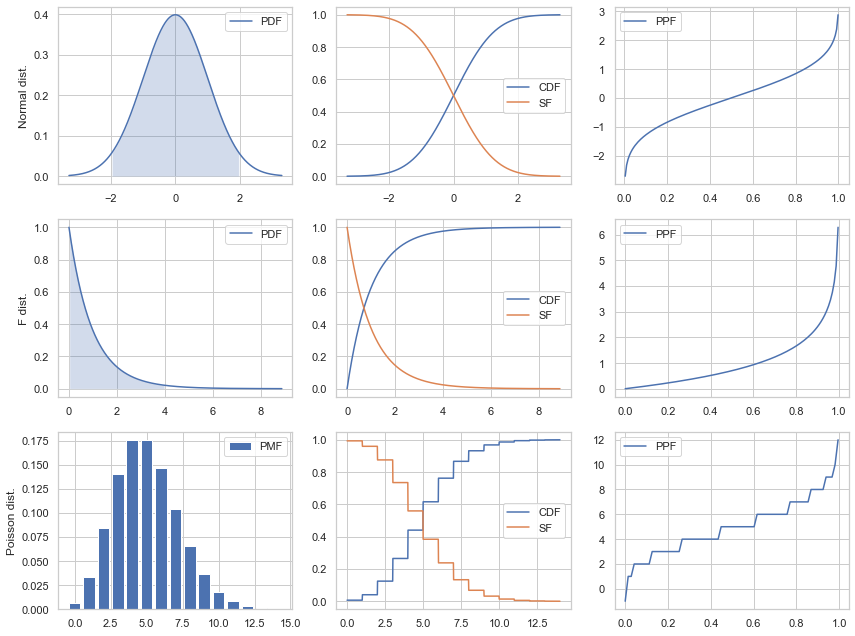

In [126]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")

In [127]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [128]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [129]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [130]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


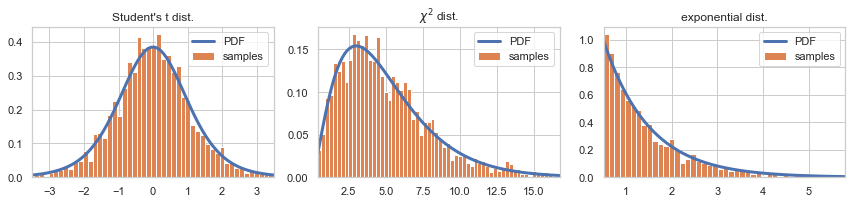

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

In [132]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

In [133]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

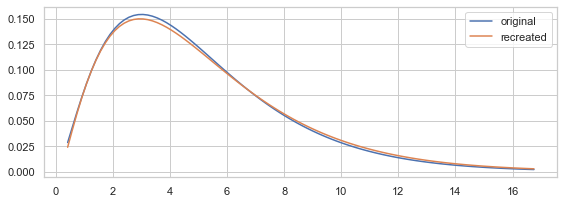

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

In [135]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.915637976521836

In [136]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-4.883742747891776

In [137]:
 stats.norm().ppf(0.025)


-1.9599639845400545

In [138]:
 2 * stats.norm().cdf(-abs(z))

8.849379778846592e-07

In [139]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

4.002543252096778e-06

In [140]:
t, p = stats.ttest_1samp(X_samples, mu)
t

-0.9096968387197821

In [141]:
p

0.3651918584495788

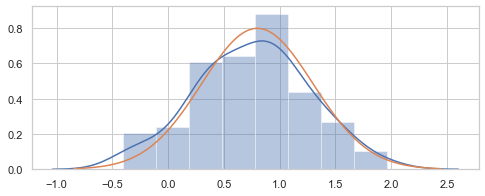

In [142]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [143]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)
t, p = stats.ttest_ind(X1_sample, X2_sample)
t

3.159596504360957

In [144]:
p

0.002101524044318263

In [145]:
mu1, mu2

(0.9002968998016874, 0.4690011995884138)

In [146]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)
kde = stats.kde.gaussian_kde(X_samples)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


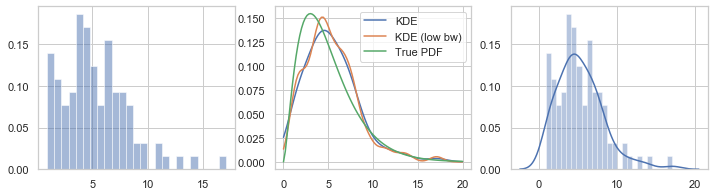

In [147]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [148]:
kde.resample(10)

array([[8.15047721, 5.7798197 , 7.62567558, 7.1776504 , 5.30703486,
        5.34635937, 0.79007269, 7.95342713, 7.89838973, 5.99040865]])

In [149]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [150]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf)

In [151]:
kde_ppf([0.05, 0.95])

array([ 0.83543261, 11.03990386])